# Prediction of Forex Prices using CNN-LSTM

## Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-whitegrid')

<ipython-input-1-3742cb43aa66>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = yf.download(tickers='EURUSD=X',start='2003-12-31',interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.to_csv("EURUSD_csv")

In [4]:
url = r"EURUSD_csv"
## Read dataset to pandas dataframe
df = pd.read_csv(url, index_col = 'Date')

In [5]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-31,1.255004,1.264894,1.253007,1.259002,1.259002,0
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0


In [6]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-20,1.116196,1.118168,1.113735,1.116196,1.116196,0
2024-09-23,1.116084,1.116819,1.108488,1.116084,1.116084,0
2024-09-24,1.111173,1.116346,1.110396,1.111173,1.111173,0
2024-09-25,1.119119,1.121240,1.114169,1.119119,1.119119,0
2024-09-26,1.113102,1.118956,1.112681,1.113102,1.113102,0


In [8]:
df.shape

(5383, 6)

In [9]:
data = df.filter(['Close']).values
data

array([[1.25900185],
       [1.25819397],
       [1.25819397],
       ...,
       [1.1111728 ],
       [1.11911905],
       [1.11310232]])

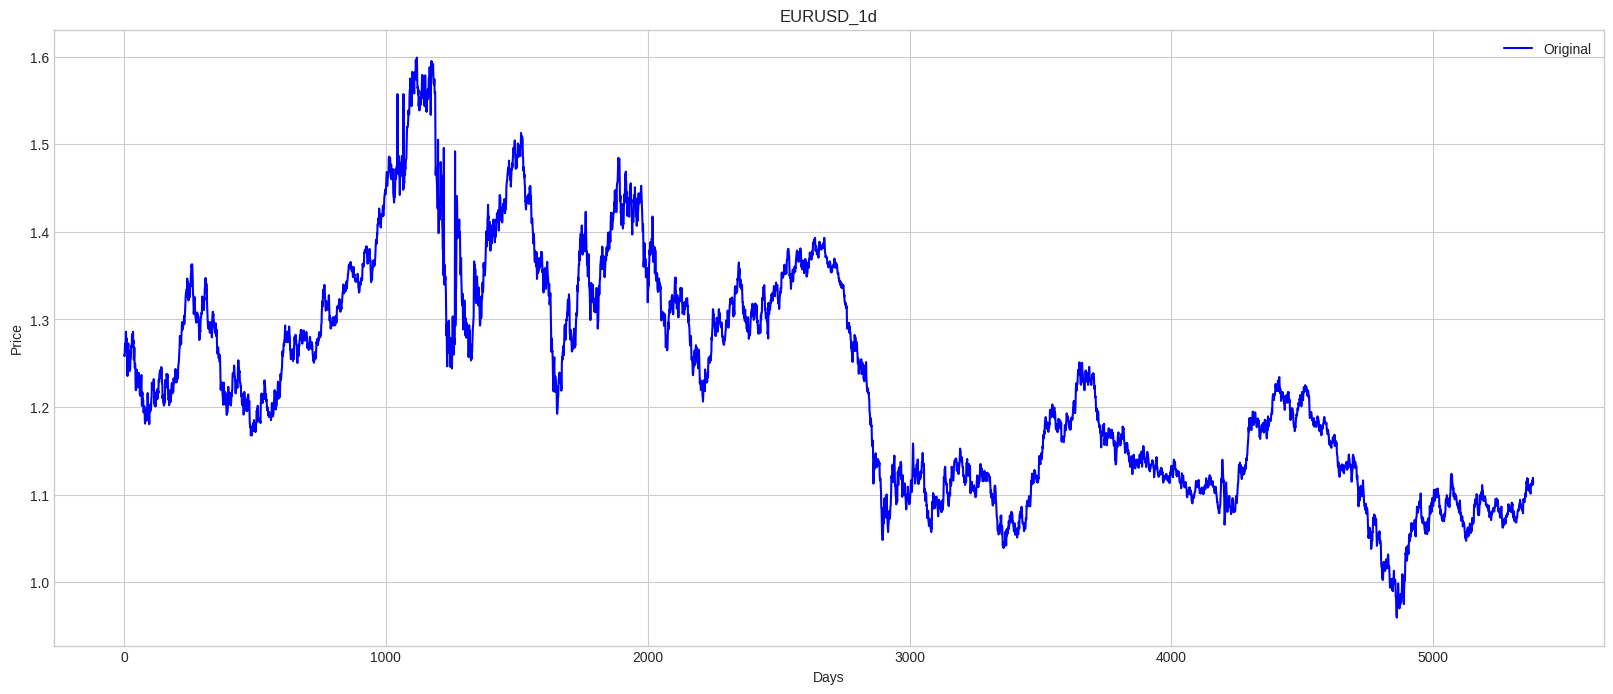

In [10]:
plt.figure(figsize = (20,8))
plt.plot(data,'b',label = 'Original')
plt.xlabel("Days")
plt.ylabel('Price')
plt.title("EURUSD_1d")
plt.legend()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.46838657],
       [0.46712263],
       [0.46712263],
       ...,
       [0.23710685],
       [0.24953882],
       [0.2401256 ]])

In [12]:
training_size = int(len(scaled_data)*0.80) #Training size is 80% of the given data
print("Training_size:",training_size)
x_train_1 = scaled_data[0:training_size,:]
print(len(x_train_1))
test_data_1= scaled_data[training_size:,:1]
print(len(test_data_1))

Training_size: 4306
4306
1077


In [13]:
print(len(x_train_1)), print(test_data_1)

4306
[[0.33485893]
 [0.34381783]
 [0.34737819]
 ...
 [0.23710685]
 [0.24953882]
 [0.2401256 ]]


(None, None)

In [15]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
       # find the end of this pattern
       end_ix = i + n_steps
       # check if we are beyond the sequence
       if end_ix > len(sequence)-1:
          break
       # gather input and output parts of the pattern
       seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
       X.append(seq_x)
       y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
#Split into samples
time_step = 120
x_train, y_train = split_sequence(x_train_1, time_step)
x_test, y_test = split_sequence(test_data_1, time_step)

In [17]:
print(x_train.shape),print(y_train.shape)

(4186, 120, 1)
(4186, 1)


(None, None)

In [18]:
print(x_test[-1]), print(y_test[-2:])

[[0.1792181 ]
 [0.17689258]
 [0.16481086]
 [0.16107519]
 [0.16040433]
 [0.16790403]
 [0.16395947]
 [0.1661604 ]
 [0.16550316]
 [0.17337157]
 [0.17267274]
 [0.1773249 ]
 [0.17376603]
 [0.17514821]
 [0.16745884]
 [0.17606488]
 [0.17786538]
 [0.18178532]
 [0.1832533 ]
 [0.18059114]
 [0.18003088]
 [0.18601486]
 [0.18370687]
 [0.18732635]
 [0.19061348]
 [0.20238691]
 [0.19894312]
 [0.20014495]
 [0.19785356]
 [0.19696823]
 [0.19228008]
 [0.19032086]
 [0.19578915]
 [0.19801974]
 [0.19645217]
 [0.18862144]
 [0.19387674]
 [0.19663644]
 [0.20513729]
 [0.2011448 ]
 [0.19999705]
 [0.20311074]
 [0.18503292]
 [0.18274563]
 [0.17900138]
 [0.19039397]
 [0.17876694]
 [0.17303102]
 [0.17905565]
 [0.17930837]
 [0.18075396]
 [0.17369441]
 [0.17077637]
 [0.1778113 ]
 [0.17419667]
 [0.16957976]
 [0.17401725]
 [0.17820781]
 [0.17849633]
 [0.18026588]
 [0.1872898 ]
 [0.19000977]
 [0.19240858]
 [0.19317903]
 [0.19065004]
 [0.19354607]
 [0.19971954]
 [0.20171942]
 [0.20422584]
 [0.20437449]
 [0.21027136]
 [0.20

(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [20]:
x_train.shape, x_test.shape

((4186, 120, 1), (957, 120, 1))

In [22]:
!pip install keras

In [25]:
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D ,MaxPooling1D, Dropout
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from keras.metrics import RootMeanSquaredError as rmse
from keras import optimizers

In [26]:
# define model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu',padding = 'same',input_shape=(120,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss= 'mse' , metrics = [rmse()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 120, 256)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 100)             │         142,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,069 (875.27 KB)

 Trainable params: 224,069 (875.27 KB)

 Non-trainable params: 0 (0.00 B)

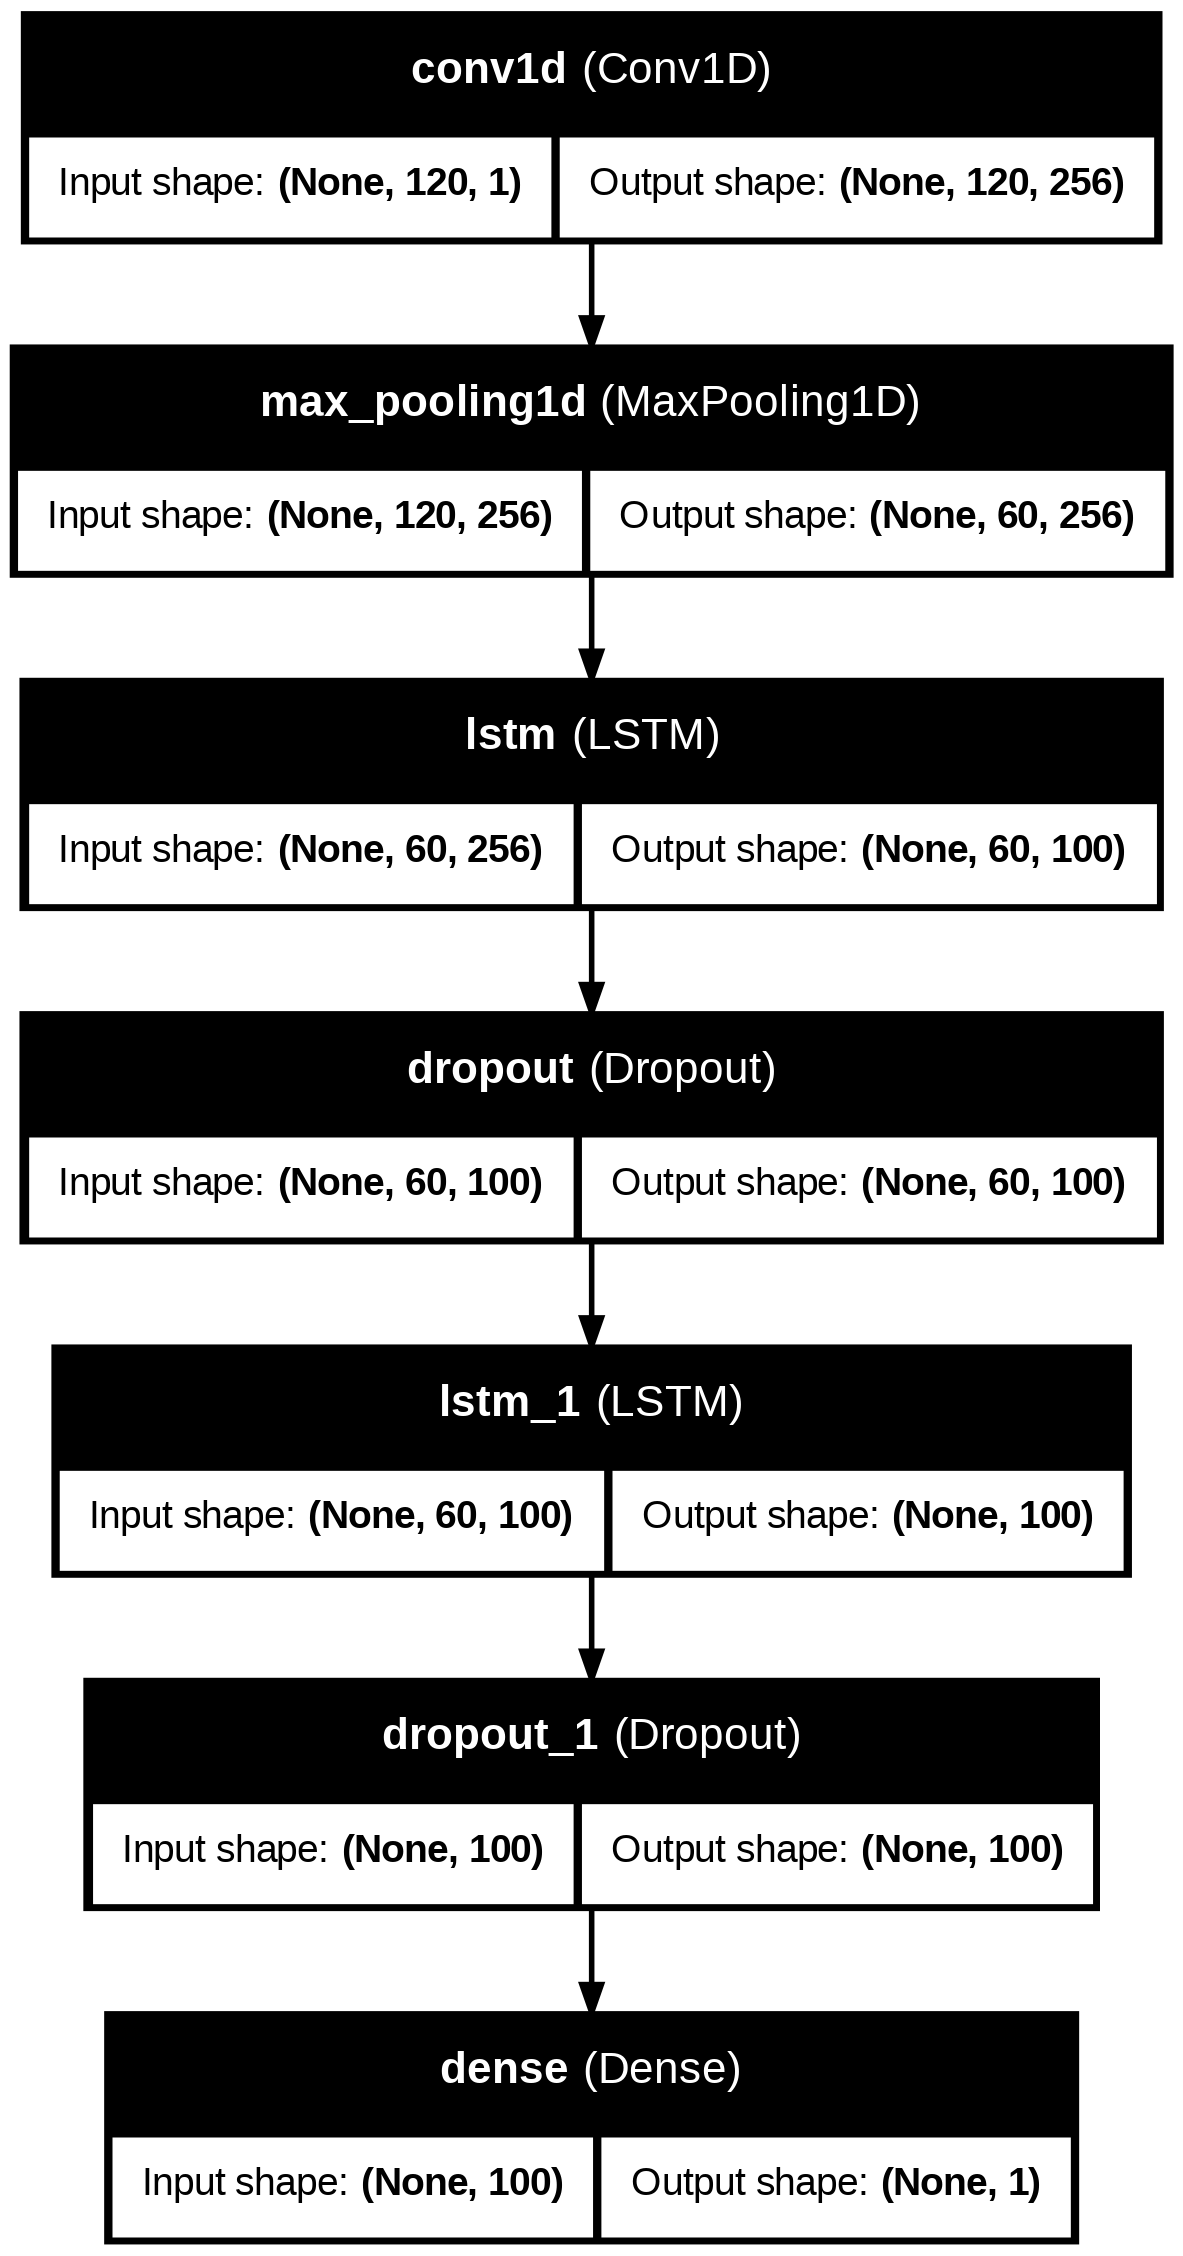

In [27]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
history = model.fit(x_train, y_train, epochs = 250 , validation_data = (x_test,y_test), batch_size=32, verbose=1)

Epoch 1/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0136 - root_mean_squared_error: 0.1118 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 2/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 3/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 4/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.8961e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0342
Epoch 5/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4513e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 6/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.7906e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 7/250
131/131 ━━━━━━━━

In [29]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

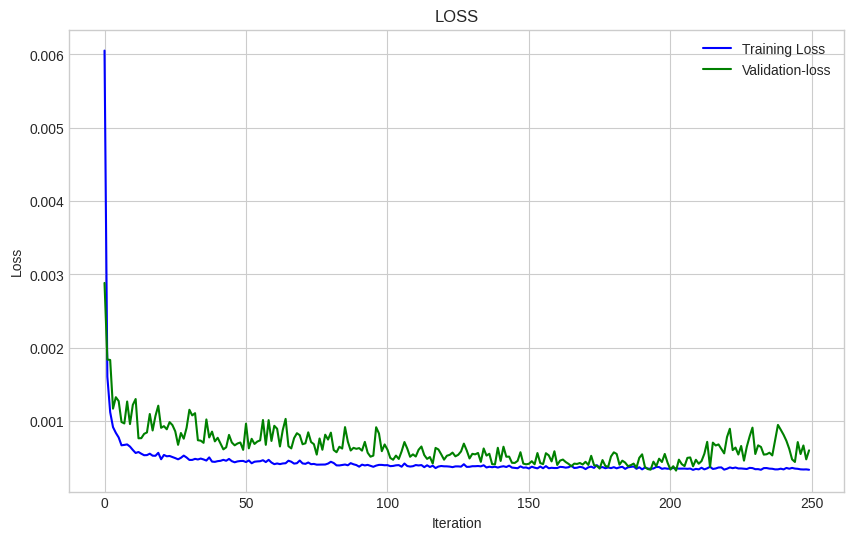

In [30]:
### Plotting iteration-loss graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'],label='Training Loss',color='b')
plt.plot(history.history['val_loss'],label='Validation-loss',color='g')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('LOSS')
plt.legend()

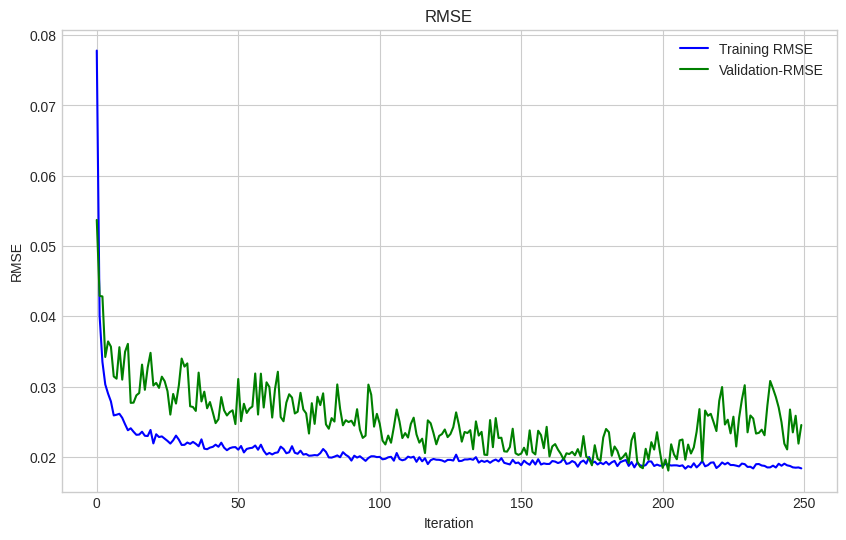

In [31]:
### Plotting iteration-rmse graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['root_mean_squared_error'],label='Training RMSE',color='b')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation-RMSE',color='g')
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title('RMSE')
plt.legend()

In [32]:
#evaluate training data
model.evaluate(x_train,y_train, batch_size = 32)

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3491e-04 - root_mean_squared_error: 0.0151


[0.000198398221982643, 0.01408538967370987]

In [33]:
#evaluate testing data
model.evaluate(x_test,y_test, batch_size = 32)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9613e-04 - root_mean_squared_error: 0.0198


[0.0006015240214765072, 0.02452598698437214]

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


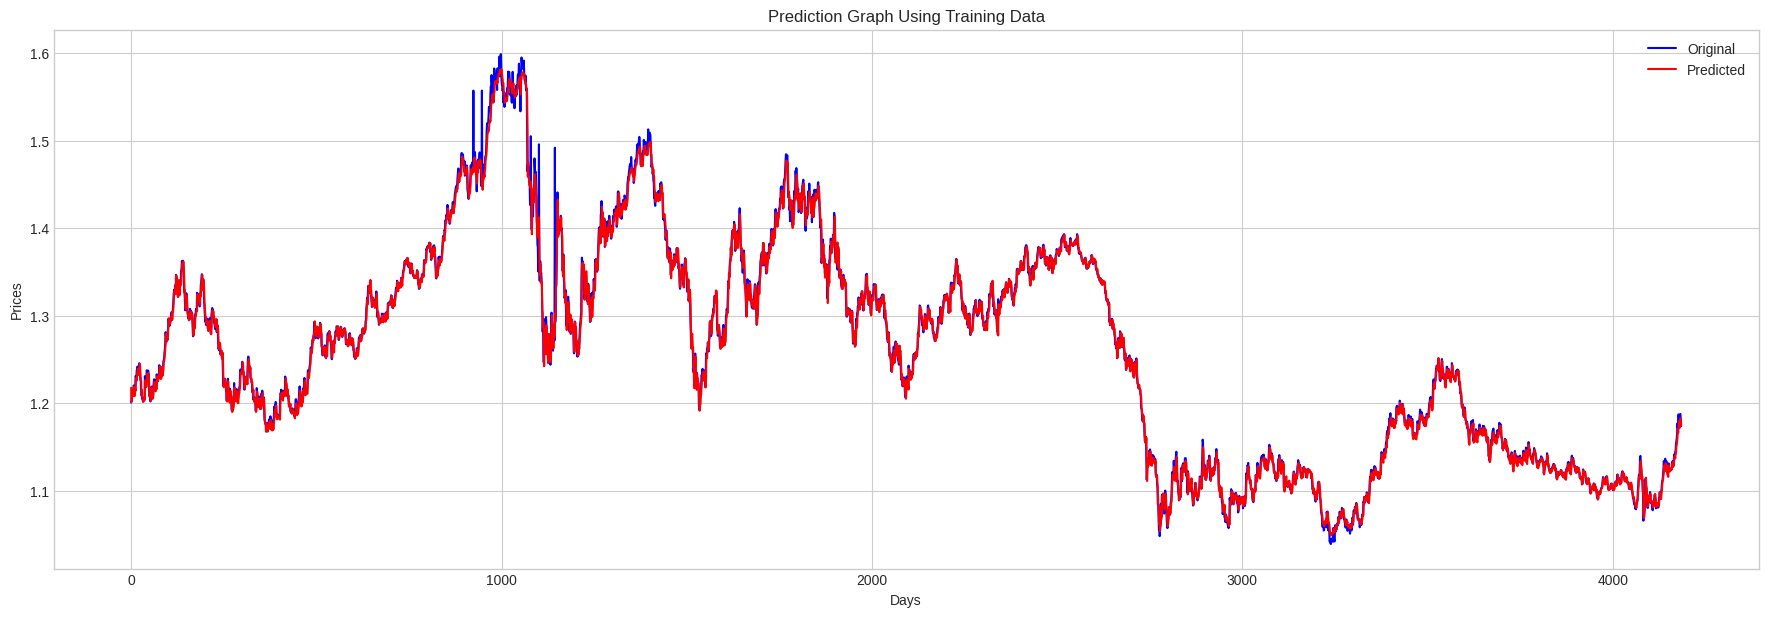

In [34]:
# prediction using training data
train_predict = model.predict(x_train)
plot_y_train = y_train.reshape(-1,1)

# Actual vs predicted training data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_train),color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(train_predict),color='red', label = 'Predicted')
plt.title("Prediction Graph Using Training Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


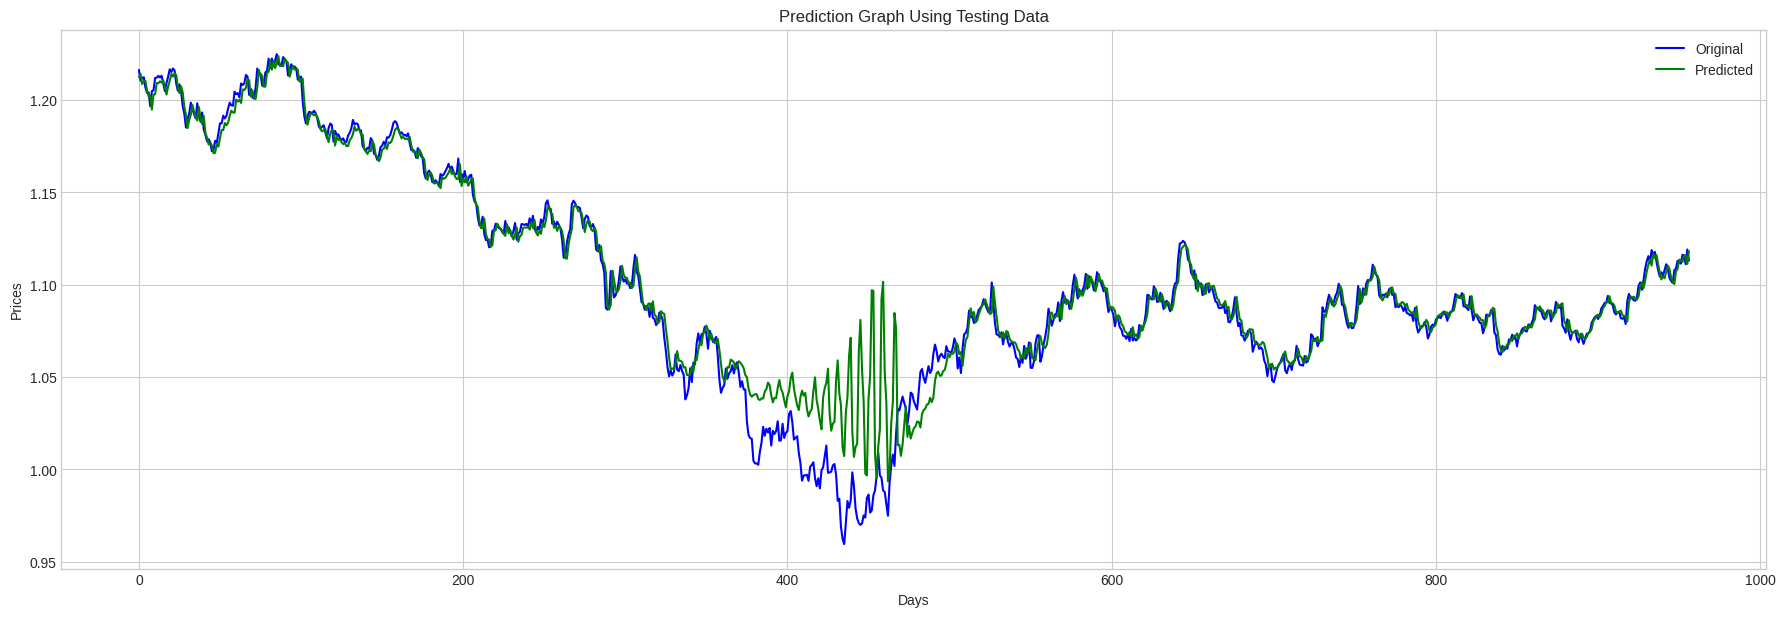

In [36]:
# prediction using testing data
test_predict = model.predict(x_test)
plot_y_test = y_test.reshape(-1,1)

# Actual vs predicted testing data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_test),color = 'b',  label = 'Original')
plt.plot(scaler.inverse_transform(test_predict),color='g', label = 'Predicted')
plt.title("Prediction Graph Using Testing Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()

In [37]:
last_actual_five = scaler.inverse_transform(y_test[-5:])
last_predicted_five = scaler.inverse_transform(test_predict[-5:])

In [38]:
compare = pd.DataFrame(last_actual_five, columns = ['Actual_Prices'])
compare['Predicted_Prices'] = last_predicted_five

In [39]:
print(compare)

   Actual_Prices  Predicted_Prices
0       1.116196          1.112352
1       1.116084          1.116101
2       1.111173          1.115656
3       1.119119          1.111263
4       1.113102          1.118215


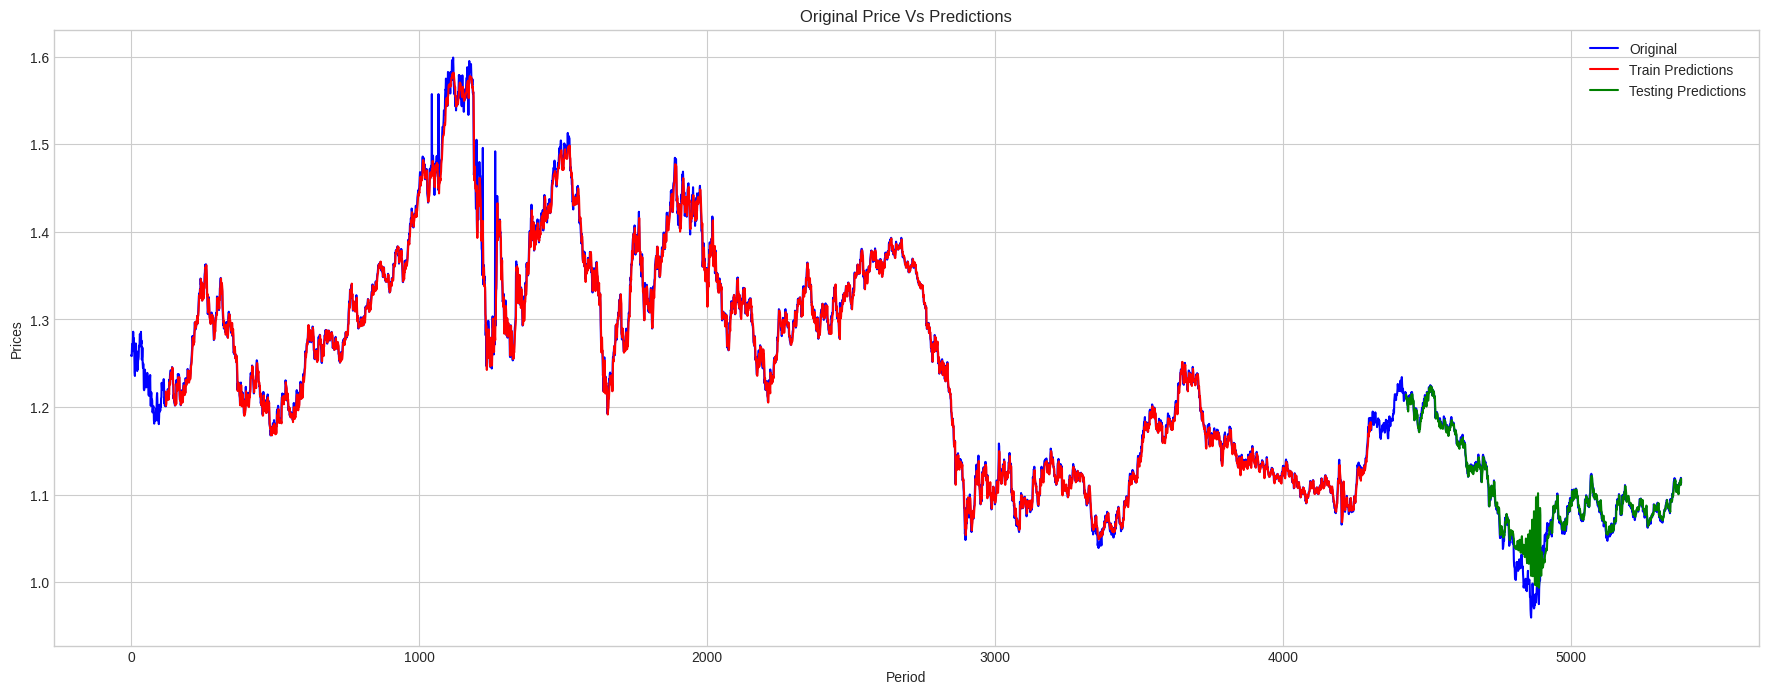

In [40]:
### Plotting
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(data), :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(22,8))
plt.plot(data,color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(trainPredictPlot),color='red',label = 'Train Predictions')
plt.plot(scaler.inverse_transform(testPredictPlot),color='green', label = 'Testing Predictions')
plt.title("Original Price Vs Predictions")
plt.xlabel('Period')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [41]:
model.save('eurusd.h5')